### RICE COOKER| ??? |                                          
##### TYPE 4 " TURN ON SOMEDAY//ONCE TIME 

## NO. 10 (หม้อหุงข้าว)
* **ช่วงแรกที่กินไฟ 600+ watt คือตอนหุงใหม่ หลังจากนั้นที่ประมาณ 64w คือมันอัตโนมัติ**
* len: 1200
![image](https://raw.githubusercontent.com/skyfighter/iHEMS/master/Device/pic/rice-cookers-2.png)

In [5]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d =31
time_a = pd.date_range('2016-09-01 00:00:00', periods=5760*(d+1), freq='15S')
# print time_a
time_b = pd.date_range('2016-09-01 00:00:14', periods=5760*(d+1), freq='15S')
# print time_b

clock1 = time_b.strftime("%H:%M:%S")

conn= MySQLdb.connect("localhost","conn","hems","collected_info")
c = conn.cursor()

conn1= MySQLdb.connect("localhost","conn","hems","device")
c1 = conn1.cursor()

####### set databases to empty #########
query_empty = """truncate table device.rice_cooker """ 
c1.execute(query_empty)
print "device.rice_cooker are Empty!!! \n"

query = "SELECT watt FROM collected_info.10_rice_cooker WHERE no >= '%s'   AND no <= '%s'; "% (0,1200)
df = pd.read_sql(query, conn)
# print df.watt[5]


#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour1 = ['16'] * 10 +  ['17'] * 60 + ['18'] * 27 + ['19'] * 3
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(40, 59)
    duration_hour1 = ['0'] * 27 + ['0'] * 70 + ['1'] * 3
    duration_hour = random.choice(duration_hour1)       
    seconds = (int(duration_hour)*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item


a = 0
days = 0
j = 0
i = 0
do_days1 = ['5'] * 3 + ['6'] * 55 + ['0'] * 42
do_days = random.choice(do_days1)
dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
print "| use rice_cooker in next week on | ... ",dict[do_days]
off_item = rand_turnon()  
no_item = rand_duration()


while (j <= (5760*d)-1):
    no_days = int(time_b[j].strftime('%w'))  # find 0-6 of no_days

    
    if (no_days == 0 and clock1[j] == u'23:59:59'):    #if no_day is SUNDAY at 23:59:59 check d0_days in week 
        do_days1 = ['5'] * 3 + ['6'] * 55 + ['0'] * 42   #fri-sat-sun
        do_days = random.choice(do_days1) 
        dict = {'5': 'Friday', '6': 'Saturday', '0': 'Sunday'}
        print "\n| use rice_cooker in next week on | ... ",dict[do_days]
        off_item = rand_turnon()  
        no_item = rand_duration()


    if (int(do_days) == no_days):
        i= 0  
        c1.execute("INSERT INTO device.rice_cooker (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        while (off_item+(5760*(days-1))<= j <= (no_item+off_item)+(5760*(days-1))):
            
            if (i >= len(df)):
                i = 400   
                
            c1.execute("INSERT INTO device.rice_cooker (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
            conn1.commit()
            i += 1 
            j += 1     
            print "|",j,
            

    else : 
        c1.execute("INSERT INTO device.rice_cooker (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
        
    if (j%5760 == 0):
        print "\nDays :",days ,":",time_b[j].strftime('%a')
        days +=1        
    j += 1
    conn1.commit()
print "DONE!"

 


device.rice_cooker are Empty!!! 

| use rice_cooker in next week on | ...  Saturday
time to turn-on appliacne on 17 : 28 : 8 equal to 4192 items
consuming the appliance 0 hours 47 minutes 52 seconds that equal to 2872 seconds or 191 items

Days : 0 : Thu

Days : 1 : Fri

Days : 2 : Sat
| 15713 | 15714 | 15715 | 15716 | 15717 | 15718 | 15719 | 15720 | 15721 | 15722 | 15723 | 15724 | 15725 | 15726 | 15727 | 15728 | 15729 | 15730 | 15731 | 15732 | 15733 | 15734 | 15735 | 15736 | 15737 | 15738 | 15739 | 15740 | 15741 | 15742 | 15743 | 15744 | 15745 | 15746 | 15747 | 15748 | 15749 | 15750 | 15751 | 15752 | 15753 | 15754 | 15755 | 15756 | 15757 | 15758 | 15759 | 15760 | 15761 | 15762 | 15763 | 15764 | 15765 | 15766 | 15767 | 15768 | 15769 | 15770 | 15771 | 15772 | 15773 | 15774 | 15775 | 15776 | 15777 | 15778 | 15779 | 15780 | 15781 | 15782 | 15783 | 15784 | 15785 | 15786 | 15787 | 15788 | 15789 | 15790 | 15791 | 15792 | 15793 | 15794 | 15795 | 15796 | 15797 | 15798 | 15799 | 15800 | 15801 |

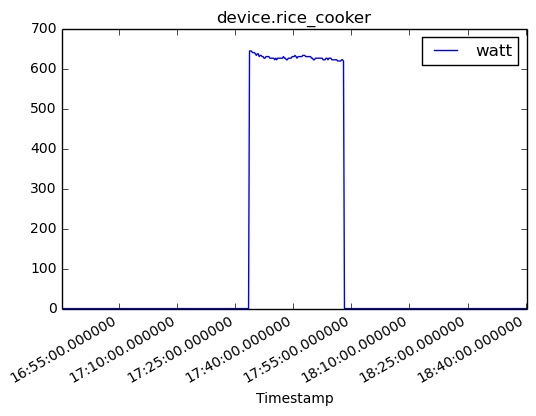

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM device.rice_cooker WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[5760*2+4000],time_b[4000*4])
df = pd.read_sql(query, conn1, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('device.rice_cooker')
df.plot(ax=ax )
plt.show()
# df.to_csv('file.csv')
# print len(df)
